In [5]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [6]:
!git clone https://github.com/ruvxn/REAL_OR_AI.git


Cloning into 'REAL_OR_AI'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.


In [7]:
%cd REAL_OR_AI/

/content/REAL_OR_AI


In [8]:
!ls

LICENSE  README.md


In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
!kaggle datasets download -d alessandrasala79/ai-vs-human-generated-dataset

Dataset URL: https://www.kaggle.com/datasets/alessandrasala79/ai-vs-human-generated-dataset
License(s): apache-2.0
100% 9.74G/9.76G [01:42<00:00, 155MB/s]
100% 9.76G/9.76G [01:42<00:00, 102MB/s]


In [11]:
!unzip ai-vs-human-generated-dataset.zip -d dataset


Streaming output truncated to the last 5000 lines.
  inflating: dataset/train_data/efd938a800124cf69ec656cd2d518fa5.jpg  
  inflating: dataset/train_data/efd97dc6cf2d44b4b635b20415c516c1.jpg  
  inflating: dataset/train_data/efd9d70912ee498485cabe62c2a9943e.jpg  
  inflating: dataset/train_data/efd9facc4ca04695ad2710f43a33219d.jpg  
  inflating: dataset/train_data/efda2fdd29ae4c19ac1ecf6c1a83166b.jpg  
  inflating: dataset/train_data/efdc29bae2ba4847aa23f5549ce3e89b.jpg  
  inflating: dataset/train_data/efdcd2eab54d4c6f87b6cb25dbaf139a.jpg  
  inflating: dataset/train_data/efdceffbac1e445e987ac4e06d8775ec.jpg  
  inflating: dataset/train_data/efde74f673c341e09ab5184fe29759da.jpg  
  inflating: dataset/train_data/efdf66dfcf4d4e53b7fc9b55cd563d0d.jpg  
  inflating: dataset/train_data/efdfd51607ed4ff8ad14ffeeb798f977.jpg  
  inflating: dataset/train_data/efe1570296ed40e39d5fc5bb77105920.jpg  
  inflating: dataset/train_data/efe241b299c0449e80982b5076920fe2.jpg  
  inflating: dataset/train

In [12]:
!ls dataset

test.csv  test_data_v2	train.csv  train_data


In [13]:
import os

dataset_path = "dataset"
print("Dataset Folders:", os.listdir(dataset_path))

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        print(f"\nContents of {folder}: {os.listdir(folder_path)[:5]}")


Dataset Folders: ['test.csv', 'test_data_v2', 'train.csv', 'train_data']

Contents of test_data_v2: ['e465d0f16d374a83945a7e9835afff07.jpg', 'e94005d4b97b49109cd74731c1b2d70b.jpg', 'f09040dbf6ee4a8fa0700f418f8ad56e.jpg', 'c3e7f603e1034db380afefb09b7b6521.jpg', '6bfffc48ef524e3fa026443442e44502.jpg']

Contents of train_data: ['7e983b03a2984210aa8c8c55149d86b8.jpg', '51a310c5e67042fdbb32481dc6c3af51.jpg', 'ac99e9937e1242fbae0c4b41defe9a1f.jpg', 'ae8eb086f2774e3e84ec216d9ef15e11.jpg', '5cc62d2e6fc24502a8132d59de644270.jpg']


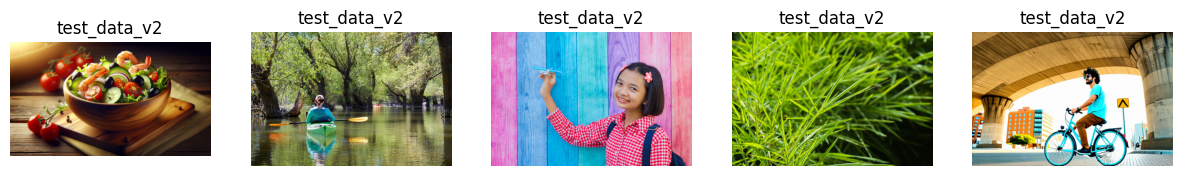

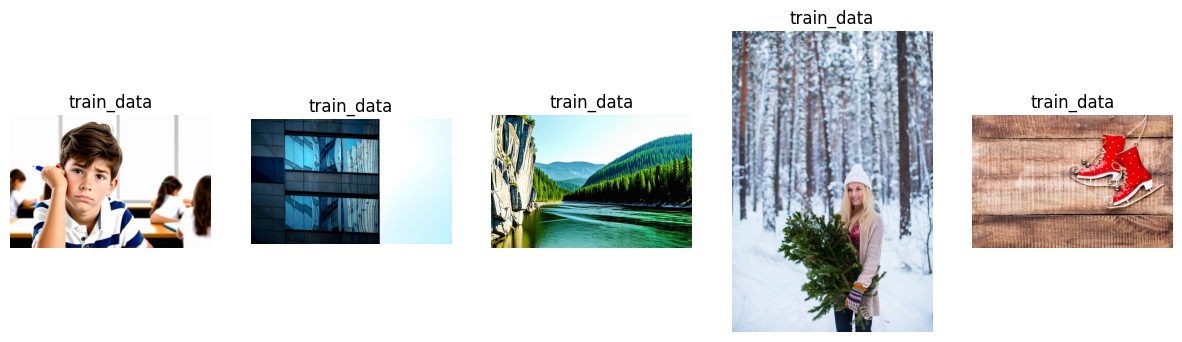

In [14]:
import matplotlib.pyplot as plt
import cv2
import random

def show_sample_images(category, num_images=5):
    category_path = os.path.join(dataset_path, category)
    images = random.sample(os.listdir(category_path), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15,5))
    for i, img_name in enumerate(images):
        img = cv2.imread(os.path.join(category_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(category)
    plt.show()

categories = os.listdir(dataset_path)
for category in categories:
    if os.path.isdir(os.path.join(dataset_path, category)):
        show_sample_images(category)


In [15]:
import pandas as pd

In [16]:
train_csv_path = os.path.join(dataset_path, "train.csv")
train_df = pd.read_csv(train_csv_path)

In [18]:
train_df["file_name"] = train_df["file_name"].apply(lambda x: os.path.join(dataset_path, x))
print(train_df.head(20))

    Unnamed: 0                                          file_name  label
0            0  dataset/dataset/train_data/a6dcb93f596a4324913...      1
1            1  dataset/dataset/train_data/041be3153810433ab14...      0
2            2  dataset/dataset/train_data/615df26ce9494e5db2f...      1
3            3  dataset/dataset/train_data/8542fe161d9147be8e8...      0
4            4  dataset/dataset/train_data/5d81fa12bc3b4cea8c9...      1
5            5  dataset/dataset/train_data/25ea852f30594bc5915...      0
6            6  dataset/dataset/train_data/e67085fb6d814cbabe0...      1
7            7  dataset/dataset/train_data/041c36d9269146cdb88...      0
8            8  dataset/dataset/train_data/4aea3b876247467c8d3...      1
9            9  dataset/dataset/train_data/09708379751e44d0bc9...      0
10          10  dataset/dataset/train_data/774aeb00dbf44520bf3...      1
11          11  dataset/dataset/train_data/2275dc00b50f4183812...      0
12          12  dataset/dataset/train_data/dea11664

In [35]:
import os

train_df["file_name"] = train_df["file_name"].apply(lambda x: os.path.join("dataset", x.replace("dataset/", "")))
val_df["file_name"] = val_df["file_name"].apply(lambda x: os.path.join("dataset", x.replace("dataset/", "")))

print(train_df.head())


       Unnamed: 0                                          file_name label
26795       26795  dataset/train_data/931e920e86b049d7be4261dce07...     0
73167       73167  dataset/train_data/b4b5f65f15804c31be53951ec0e...     0
71554       71554  dataset/train_data/4da492751caf4441a0e0026b01c...     1
31062       31062  dataset/train_data/042899eafa014cb8925d58aa0e9...     1
31818       31818  dataset/train_data/c735011681244ac196d8ca3b13a...     1


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train_df, val_df = train_test_split(train_df, test_size=0.05, random_state=524, stratify=train_df["label"])
print(f"Training set: {train_df.shape}")
print(f"Validation set: {val_df.shape}")

Training set: (72154, 3)
Validation set: (3798, 3)


In [38]:
train_df["label"] = train_df["label"].astype(str)
val_df["label"] = val_df["label"].astype(str)

print(train_df.dtypes)
print(train_df.head())

Unnamed: 0     int64
file_name     object
label         object
dtype: object
       Unnamed: 0                                          file_name label
13323       13323  dataset/train_data/42c1e3d10fa442ad9fdbdcd702d...     0
49655       49655  dataset/train_data/66e96aeaeb444db1bf575a24472...     0
37403       37403  dataset/train_data/ab286d54eabc4d6e88971e03821...     0
75184       75184  dataset/train_data/8ba78db588f948469f6c4f10fd0...     1
77642       77642  dataset/train_data/141ae518bcd34bf49f6dacda93c...     1


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

#Image Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

# Validation - No Augmentation
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from train.csv
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="file_name",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="file_name",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

# Verify
print("Train Generator Ready:", train_generator)
print("Validation Generator Ready:", val_generator)


Found 72154 validated image filenames belonging to 2 classes.
Found 3798 validated image filenames belonging to 2 classes.
Train Generator Ready: <keras.src.legacy.preprocessing.image.DataFrameIterator object at 0x79befe286650>
Validation Generator Ready: <keras.src.legacy.preprocessing.image.DataFrameIterator object at 0x79befe0aa090>


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [42]:
#build model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),


    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
#compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,212,545 (99.99 MB)

 Trainable params: 26,211,585 (99.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2)


In [46]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2255/2255 ━━━━━━━━━━━━━━━━━━━━ 1105s 482ms/step - accuracy: 0.8328 - loss: 0.5763 - val_accuracy: 0.8905 - val_loss: 0.3200 - learning_rate: 1.0000e-04
Epoch 2/15
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 1075s 475ms/step - accuracy: 0.9001 - loss: 0.2750 - val_accuracy: 0.8441 - val_loss: 0.4928 - learning_rate: 1.0000e-04
Epoch 3/15
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 1080s 478ms/step - accuracy: 0.9117 - loss: 0.2391 - val_accuracy: 0.8533 - val_loss: 0.4108 - learning_rate: 1.0000e-04
Epoch 4/15
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 1091s 482ms/step - accuracy: 0.9306 - loss: 0.1905 - val_accuracy: 0.8770 - val_loss: 0.3036 - learning_rate: 7.0000e-05
Epoch 5/15
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 1085s 480ms/step - accuracy: 0.9366 - loss: 0.1711 - val_accuracy: 0.8568 - val_loss: 0.3647 - learning_rate: 7.0000e-05
Epoch 6/15
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 1079s 477ms/step - accuracy: 0.9421 - loss: 0.1578 - val_accuracy: 0.8791 - val_loss: 0.2965 - learning_rate: 7.0000e-05
Epoch 7/15
2255/2255 ━━━━━━━━━━━━

In [48]:
import matplotlib.pyplot as plt

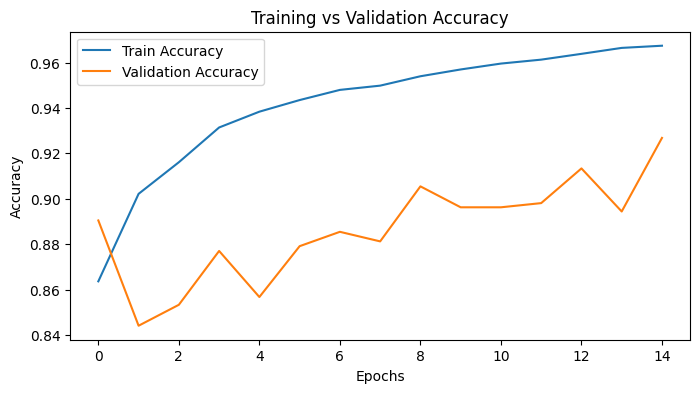

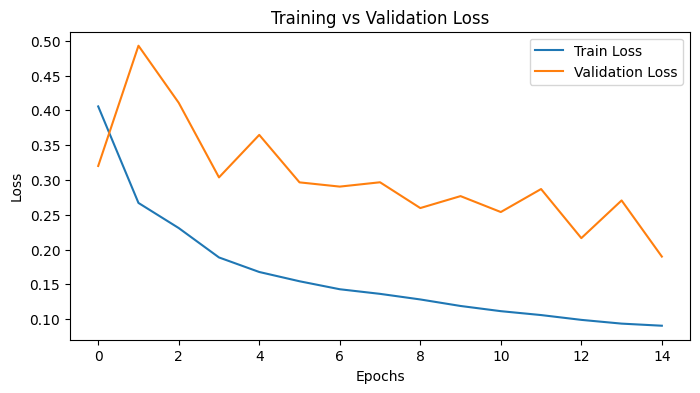

In [49]:
# Plot Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [56]:
# Load test.csv
test_csv_path = os.path.join(dataset_path, "test.csv")
test_df = pd.read_csv(test_csv_path)

print("Columns in test.csv:", test_df.columns)
print(test_df.head())


Columns in test.csv: Index(['id'], dtype='object')
                                                  id
0  test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1  test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2  test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3  test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4  test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [57]:
# Rename id column to file_name for TensorFlow compatibility
test_df.rename(columns={"id": "file_name"}, inplace=True)


test_df["file_name"] = test_df["file_name"].apply(lambda x: os.path.join("dataset", x))

print("Updated test_df structure:")
print(test_df.head())


Updated test_df structure:
                                           file_name
0  dataset/test_data_v2/1a2d9fd3e21b4266aea1f66b3...
1  dataset/test_data_v2/ab5df8f441fe4fbf9dc9c6baa...
2  dataset/test_data_v2/eb364dd2dfe34feda0e52466b...
3  dataset/test_data_v2/f76c2580e9644d85a741a42c6...
4  dataset/test_data_v2/a16495c578b7494683805484c...


In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a test image generator with no augmentation, only rescaling
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="file_name",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,  # No labels since its  making predictions
    shuffle=False
)

print(" Test Generator Ready:", test_generator)


Found 5540 validated image filenames.
 Test Generator Ready: <keras.src.legacy.preprocessing.image.DataFrameIterator object at 0x79be5bfff990>


In [60]:
# Make predictions
predictions = model.predict(test_generator)

# 0 = Real, 1 = AI-generated
predictions = (predictions > 0.5).astype(int)

test_df["prediction"] = predictions
print(test_df.head())


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 166s 945ms/step
                                           file_name  prediction
0  dataset/test_data_v2/1a2d9fd3e21b4266aea1f66b3...           1
1  dataset/test_data_v2/ab5df8f441fe4fbf9dc9c6baa...           1
2  dataset/test_data_v2/eb364dd2dfe34feda0e52466b...           0
3  dataset/test_data_v2/f76c2580e9644d85a741a42c6...           0
4  dataset/test_data_v2/a16495c578b7494683805484c...           0


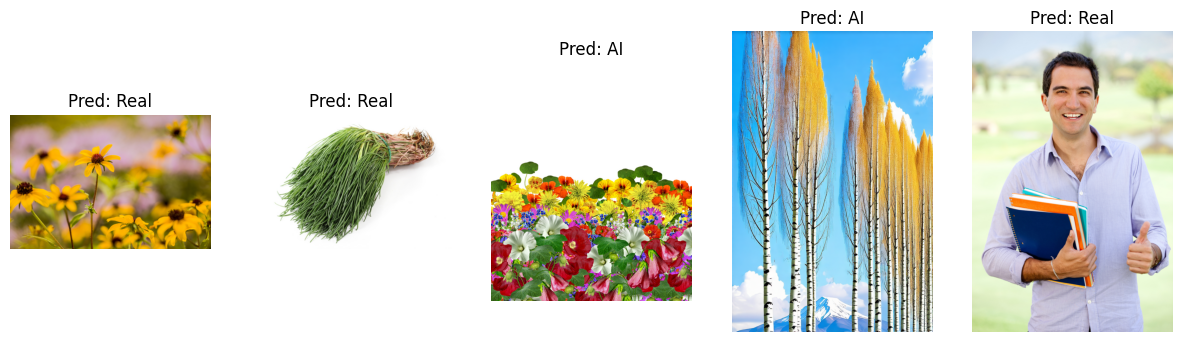

In [61]:
import matplotlib.pyplot as plt
import cv2
import random

# Select random test images
sample_images = test_df.sample(5)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, row in enumerate(sample_images.itertuples()):
    img = cv2.imread(row.file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Pred: {'AI' if row.prediction == 1 else 'Real'}")

plt.show()

In [63]:
model.save("real_or_ai_classifier.h5")
print(" Model saved as real_or_ai_classifier.h5")

 Model saved as real_or_ai_classifier.h5


In [64]:
from google.colab import files
files.download("real_or_ai_classifier.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>